# Plot Correlations

In [1]:
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/projects/wind_uq/lcheung/amrwind-frontend/',
                 '/ccs/proj/cfd162/lcheung/amr-wind-frontend.lcc/'
                ]
import sys, os, shutil, io
for x in amrwindfedirs: sys.path.insert(1, x)

In [2]:
import postproengine as ppeng
import ruamel.yaml    
yaml = ruamel.yaml.YAML(typ='rt')
Loader= yaml.load
loaderkwargs = {}
dumperkwargs = {}

In [7]:
yamlstring="""
globalattributes:
  verbose: True
  udfmodules: 
  - plothelper.py
  executeorder:
  - plotcsv

plotcsv:
  - name: plotRijLONG
    xlabel: xi [m]
    ylabel: '$R_{ij}(xi)$'
    title: 'Two point correlation (longitudindal)'
    figsize: [5,4]
    legendopts: {'loc':'upper right'}
    postplotfunc: plothelper.formatcorrplot
    csvfiles:
    - {'file':'../AMR.5kmX5km_turbine1/post_processing/correlation.AVG_Rij.csv', 'xcol':'xi', 'ycol':'RijLong', 'lineopts':{'color':'b', 'lw':1, 'linestyle':'-', 'label':'AMR-Wind'}}
    - {'file':'../NALU.5kmX5km_turbine1/postprocessing/correlation.AVG_Rij.csv', 'xcol':'xi', 'ycol':'RijLong', 'lineopts':{'color':'g', 'lw':1, 'linestyle':'--', 'label':'Nalu-Wind'}}
    - {'file':'../WRFLES.5kmX5km_turbine1/post_processing/correlation.AVG_Rij.csv', 'xcol':'xi', 'ycol':'RijLong', 
       'lineopts':{'color':'orange', 'lw':1, 'linestyle':'-.', 'label':'WRF-LES'}}
  - name: plotRijLAT
    xlabel: xi [m]
    ylabel: '$R_{ij}(xi)$'
    title: 'Two point correlation (lateral)'
    figsize: [5,4]
    legendopts: {'loc':'upper right'}
    postplotfunc: plothelper.formatcorrplot
    csvfiles:
    - {'file':'../AMR.5kmX5km_turbine1/post_processing/correlation.AVG_Rij.csv', 'xcol':'xi', 'ycol':'RijLat',  'lineopts':{'color':'b', 'lw':1, 'linestyle':'-', 'label':'AMR-Wind'}}
    - {'file':'../NALU.5kmX5km_turbine1/postprocessing/correlation.AVG_Rij.csv', 'xcol':'xi', 'ycol':'RijLat',  'lineopts':{'color':'g', 'lw':1, 'linestyle':'--', 'label':'Nalu-Wind'}}
    - {'file':'../WRFLES.5kmX5km_turbine1/post_processing/correlation.AVG_Rij.csv', 'xcol':'xi', 'ycol':'RijLat', 
       'lineopts':{'color':'orange', 'lw':1, 'linestyle':'-.', 'label':'WRF-LES'}}    
"""
f = io.StringIO(yamlstring)
yamldict = Loader(f, **loaderkwargs)

Initialized plotcsv
Running plotcsv


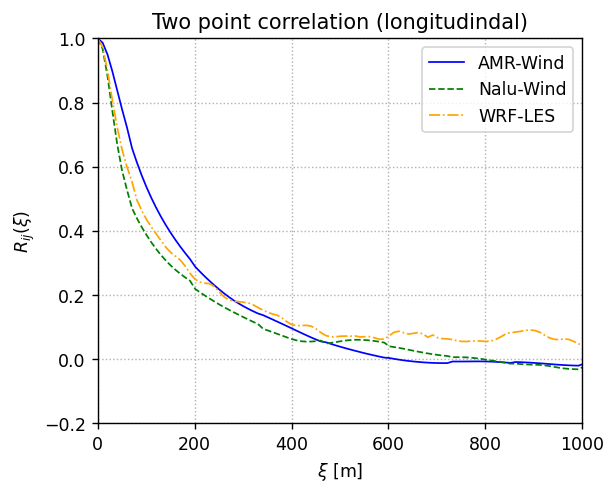

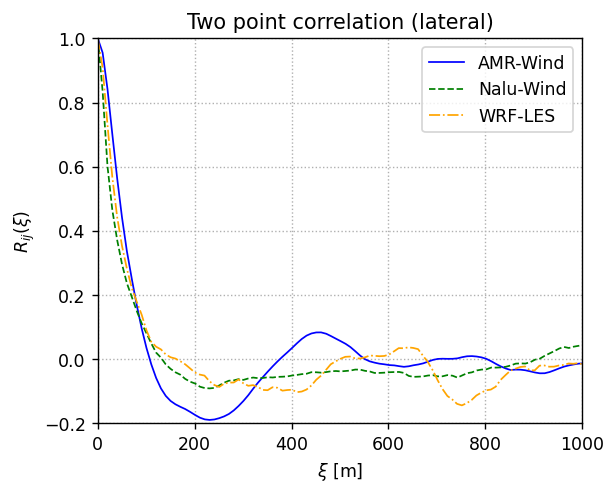

In [8]:
# Run the driver
ppeng.driver(yamldict)